In [1]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(100_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [3]:
sjrtd_itp_id = 284

In [4]:
analysis_date = dt.date(2022, 2, 8)

In [5]:
pbar = tqdm()

0it [00:00, ?it/s]

In [6]:
sjrtd = rt.OperatorDayAnalysis(sjrtd_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
less than 1km of data
vehicle positions gdf must not be empty
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
could not generate delays for trip 257117
Columns must be same length as key
could not generate delays for trip 257127
Columns must be same length as key
could not generate delays for trip 255934
Columns must be same length as key


/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [7]:
sjrtd.set_filter(start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': None, 'direction_id': None, 'direction': None}


In [8]:
m = rt.OperatorDayAnalysis.segment_speed_map(sjrtd)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': None, 'direction_id': None, 'direction': None}
speed above 80 for shape 32100, dropping
negative speed for shape 32100, dropping
speed above 80 for shape 32140, dropping
negative speed for shape 32140, dropping
speed above 80 for shape 32111, dropping
negative speed for shape 32111, dropping
speed above 80 for shape 32109, dropping
negative speed for shape 32109, dropping
speed above 80 for shape 32197, dropping
negative speed for shape 32197, dropping
speed above 80 for shape 32222, dropping
negative speed for shape 32114, dropping
negative speed for shape 32102, dropping
speed above 80 for shape 32103, dropping
negative speed for shape 32103, dropping
speed above 80 for shape 32105, dropping


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract


speed above 80 for shape 32116, dropping
negative speed for shape 32116, dropping
negative speed for shape 32163, dropping
speed above 80 for shape 32183, dropping
negative speed for shape 32183, dropping


TopologyException: assigned depths do not match at -116060.80090243505 1239.5472101856335
TopologyException: assigned depths do not match at -117953.55795454726 1648.8320321653728
TopologyException: assigned depths do not match at -117953.55795454726 1648.8320321653728
/opt/conda/lib/python3.9/site-packages/shapely/ops.py:634: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
Input geom 1 is INVALID: Self-intersection at or near point -112002.82831454017 10863.90563969472 (-112002.82831454016559 10863.905639694719866)
<A>
MULTIPOLYGON (((-114084.0060600302240346 11813.8892132562868937, -114133.6894329562346684 11835.6277149225752510, -114083.3837823768844828 11855.8846031285356730, -114084.0060600302240346 11813.8892132562868937)), ((-112001.2387243993725860 10858.0429960649416898, -112014.0182606407324784 10905.1758165411702066, -111999.0615781328669982 10919.9168357853995985, -112001.2387243993725860 10858.04299

In [9]:
sjrtd.calitp_agency_name

'San Joaquin Regional Transit District'

In [10]:
sjrtd.display_date

'Feb 08 (Tue)'

In [11]:
sjrtd.filter_formatted

', All Routes, PM Peak, Feb 08 (Tue)'

In [36]:
# m

In [37]:
sjrtd.set_filter(route_ids=['47'], direction_id='1')

{'start_time': None, 'end_time': None, 'route_ids': ['47'], 'direction_id': '1', 'direction': None}


In [17]:
one_seg = sjrtd.stop_segment_speed_view >> filter(_.shape_id == '32173', _.stop_sequence == 4)

In [24]:
one_shape = sjrtd.stop_segment_speed_view >> filter(_.shape_id == '32173')

<AxesSubplot:xlabel='stop_sequence', ylabel='speed_mph'>

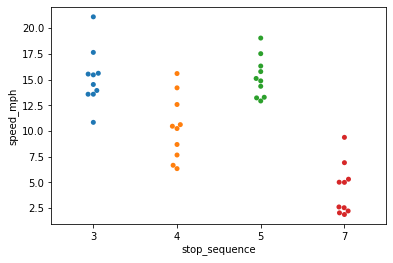

In [33]:
sns.swarmplot(x=one_shape.stop_sequence, y=one_shape.speed_mph)

In [43]:
sjrtd.endpoint_delay_view >> inner_join(_, sjrtd.rt_trips >> select(_.trip_id, _.mean_speed_mph), on = 'trip_id')

,stop_id,stop_name,geometry,shape_id,shape_meters,trip_key,trip_id,stop_sequence,arrival_time,route_id,direction_id,actual_time,delay,arrival_hour,mean_speed_mph
0,3026,SAN JOAQUIN ST & MAIN ST FS/NB,POINT (-112951.132 -6260.469),32180,12340.666901,4337893699326183543,256724,25,2022-02-08 07:02:04,510,0,2022-02-08 07:02:50.384995,0 days 00:00:46.384995,7,17.010035
1,3026,SAN JOAQUIN ST & MAIN ST FS/NB,POINT (-112951.132 -6260.469),32180,12340.666901,8130581965145306683,256730,25,2022-02-08 13:12:46,510,0,2022-02-08 13:13:44.326269,0 days 00:00:58.326269,13,15.671778
2,3090,SAN JOAQUIN ST & HAZELTON FS/NB,POINT (-112818.617 -6920.880),32180,11666.768633,1535268322434119606,256739,23,2022-02-08 18:40:43,510,0,2022-02-08 18:42:33.770493,0 days 00:01:50.770493,18,21.030831
3,3026,SAN JOAQUIN ST & MAIN ST FS/NB,POINT (-112951.132 -6260.469),32180,12340.666901,7763748531631942666,256735,25,2022-02-08 16:22:46,510,0,2022-02-08 16:28:48.107215,0 days 00:06:02.107215,16,17.353114
4,3026,SAN JOAQUIN ST & MAIN ST FS/NB,POINT (-112951.132 -6260.469),32180,12340.666901,-1127009894738766735,256723,25,2022-02-08 05:51:28,510,0,2022-02-08 05:50:22.896274,0 days 00:00:00,5,19.892736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,3385,MLK BLVD & SAN JOAQUIN ST FS/WB,POINT (-112642.602 -7793.114),32177,4768.876801,1620775632447595493,256674,5,2022-02-08 16:35:57,49,1,2022-02-08 16:38:46.292536,0 days 00:02:49.292536,16,6.026893
770,3385,MLK BLVD & SAN JOAQUIN ST FS/WB,POINT (-112642.602 -7793.114),32177,4768.876801,4547974188146886476,256667,5,2022-02-08 14:50:57,49,1,2022-02-08 14:52:33.467996,0 days 00:01:36.467996,14,8.335961
771,3385,MLK BLVD & SAN JOAQUIN ST FS/WB,POINT (-112642.602 -7793.114),32177,4768.876801,-6360151290920940320,256654,5,2022-02-08 09:00:26,49,1,2022-02-08 09:00:35.590142,0 days 00:00:09.590142,9,13.644628
772,7102,STOCKTON ST & CHARTER WY NS NB,POINT (-114091.051 -8135.039),32176,10224.529411,2173434120361333019,256666,9,2022-02-08 14:47:55,49,1,2022-02-08 14:51:47.640894,0 days 00:03:52.640894,14,10.379573


view filter: {'start_time': None, 'end_time': None, 'route_ids': ['47'], 'direction_id': '1', 'direction': None}


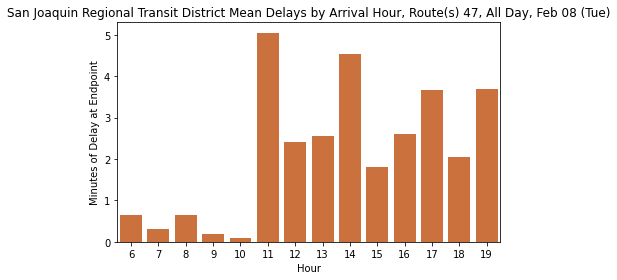

In [38]:
chart = sjrtd.chart_delays();

In [32]:
chart.savefig('./seaborn_chart.png', bbox_inches='tight')

In [16]:
rt_1 = sjrtd.endpoint_delay_summary >> filter(_.route_id == '44', _.direction_id == '0')

In [17]:
rt_1['Minutes of Delay at Endpoint'] = rt_1.mean_end_delay.apply(lambda x: x.seconds / 60)
rt_1['Hour'] = rt_1.arrival_hour

/tmp/ipykernel_880/2582780535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_880/2582780535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
import seaborn as sns

In [ ]:
sjrtd.endpoint_delay_view >> filter(_.direction_id == '1', _.route_id == '44', _.arrival_hour == 17)

In [ ]:
rt_delay_joined = sjrtd.rt_trips >> inner_join(_, sjrtd.endpoint_delay_view >> select(_.trip_id, _.endpoint_delay == _.delay,
                                                                      _.arrival_hour)
                              , on = 'trip_id')

In [ ]:
rt_delay_joined >> arrange(_.mean_speed_mph) >> head(20)

In [ ]:
dt1 = sjrtd.position_interpolators['256383']['rt']

In [ ]:
dt2 = sjrtd.position_interpolators['256519']['rt']